In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-df/Preprocess_df_1.csv
/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz
/kaggle/input/lending-club/accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018q4.csv/rejected_2007_to_2018Q4.csv
/kaggle/input/preprocessed-df/y_train (1).csv
/kaggle/input/preprocessed-df/y_test (1).csv
/kaggle/input/preprocessed-df/Scaler_test_df.csv
/kaggle/input/preprocessed-df/Scaler_train_df.csv


In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
new_df = pd.read_csv('/kaggle/input/new-df/Preprocess_df_1.csv')

In [20]:
new_df.head()

,installment,loan_status,dti,inq_last_6mths,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,acc_open_past_24mths,...,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_actv_rev_tl,num_tl_op_past_12m,percent_bc_gt_75,debt_settlement_flag,home_ownership_RENT,verification_status_Verified,y
0,123.03,0,5.91,1.0,821.72,0.0,0.0,0.0,122.67,4.0,...,1.0,4.0,4.0,4.0,3.0,0.0,0,0,0,0
1,820.28,0,16.06,4.0,979.66,0.0,0.0,0.0,926.35,4.0,...,4.0,2.0,0.0,5.0,2.0,7.7,0,0,0,0
2,432.66,0,10.78,0.0,2705.92,0.0,0.0,0.0,15813.30,6.0,...,5.0,101.0,10.0,3.0,0.0,50.0,0,0,0,0
3,289.91,0,25.37,3.0,1340.50,0.0,0.0,0.0,10128.96,10.0,...,6.0,4.0,1.0,6.0,4.0,60.0,0,0,1,0
4,405.18,0,10.20,0.0,1758.95,0.0,0.0,0.0,7653.56,0.0,...,0.0,36.0,NaN,3.0,0.0,100.0,0,1,1,0


In [21]:
new_df.shape

(1345350, 25)

In [22]:
new_df['loan_status'].value_counts(normalize = True)

loan_status
0    0.80035
1    0.19965
Name: proportion, dtype: float64

In [23]:
# Force uninstall all versions to ensure a clean slate
!pip uninstall scikit-learn imbalanced-learn -y

# Install the latest stable versions
!pip install scikit-learn imbalanced-learn

print("Installation complete. PLEASE RESTART THE KERNEL NOW.")

Found existing installation: scikit-learn 1.7.2
Uninstalling scikit-learn-1.7.2:
  Successfully uninstalled scikit-learn-1.7.2
Found existing installation: imbalanced-learn 0.14.0
Uninstalling imbalanced-learn-0.14.0:
  Successfully uninstalled imbalanced-learn-0.14.0
  Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached scikit_learn-1.7.2-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.7.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
skle

In [24]:
new_df.columns

Index(['installment', 'loan_status', 'dti', 'inq_last_6mths', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'num_actv_rev_tl', 'num_tl_op_past_12m',
       'percent_bc_gt_75', 'debt_settlement_flag', 'home_ownership_RENT',
       'verification_status_Verified', 'y'],
      dtype='object')

In [25]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'new_df'

# List of columns provided
columns_to_impute = [
    'installment', 'loan_status', 'dti', 'inq_last_6mths', 'total_rec_int',
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
    'last_pymnt_amnt', 'acc_open_past_24mths', 'avg_cur_bal',
    'bc_open_to_buy', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
    'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
    'mths_since_recent_inq', 'num_actv_rev_tl', 'num_tl_op_past_12m',
    'percent_bc_gt_75', 'debt_settlement_flag', 'home_ownership_RENT',
    'verification_status_Verified'
]

# Calculate the median for each column and store it in a dictionary
median_values = new_df[columns_to_impute].median()

# Impute (replace NaN values) in the specified columns using the calculated median
new_df[columns_to_impute] = new_df[columns_to_impute].fillna(median_values)

print("Null values in the specified columns have been replaced with their respective median values.")

# Optional: Verify that there are no more NaNs in the specified columns
print("\nNumber of NaNs in imputed columns after processing:")
print(new_df[columns_to_impute].isnull().sum())

Null values in the specified columns have been replaced with their respective median values.

Number of NaNs in imputed columns after processing:
installment                     0
loan_status                     0
dti                             0
inq_last_6mths                  0
total_rec_int                   0
total_rec_late_fee              0
recoveries                      0
collection_recovery_fee         0
last_pymnt_amnt                 0
acc_open_past_24mths            0
avg_cur_bal                     0
bc_open_to_buy                  0
mo_sin_old_rev_tl_op            0
mo_sin_rcnt_rev_tl_op           0
mo_sin_rcnt_tl                  0
mort_acc                        0
mths_since_recent_bc            0
mths_since_recent_inq           0
num_actv_rev_tl                 0
num_tl_op_past_12m              0
percent_bc_gt_75                0
debt_settlement_flag            0
home_ownership_RENT             0
verification_status_Verified    0
dtype: int64


In [26]:
new_df = new_df.drop(columns = 'y',axis = 1)

In [27]:
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.utils.class_weight import compute_class_weight
# from collections import Counter

# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
# import matplotlib.pyplot as plt

# # ===========================
# # GPU Setup
# # ===========================
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

# # ===========================
# # 1. Split ✂️
# # ===========================
# TARGET_COLUMN = 'loan_status'
# X = new_df.drop(columns=[TARGET_COLUMN]).values
# y = new_df[TARGET_COLUMN].values.astype(np.float32)

# X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y
# )

# print("Train distribution:", Counter(y_train_np))
# print("Test distribution:", Counter(y_test_np))

# # ===========================
# # 2. Scaling
# # ===========================
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train_np)
# X_test_scaled = scaler.transform(X_test_np)

# # ===========================
# # 3. Class Weights + Sampler ✅
# # ===========================
# class_weights = compute_class_weight(
#     class_weight="balanced",
#     classes=np.unique(y_train_np),
#     y=y_train_np
# )
# pos_weight = torch.tensor([class_weights[1] / class_weights[0]]).to(device)
# print("pos_weight:", pos_weight)

# class_sample_count = np.array([Counter(y_train_np)[i] for i in np.unique(y_train_np)])
# weights = 1.0 / class_sample_count
# sample_weights = weights[y_train_np.astype(int)]
# sample_weights_tensor = torch.from_numpy(sample_weights).double()

# sampler = WeightedRandomSampler(
#     weights=sample_weights_tensor,
#     num_samples=len(sample_weights_tensor),
#     replacement=True
# )

# # ===========================
# # 4. Datasets + Loaders
# # ===========================
# train_dataset = TensorDataset(
#     torch.tensor(X_train_scaled, dtype=torch.float32),
#     torch.tensor(y_train_np.reshape(-1,1), dtype=torch.float32)
# )
# test_dataset = TensorDataset(
#     torch.tensor(X_test_scaled, dtype=torch.float32),
#     torch.tensor(y_test_np.reshape(-1,1), dtype=torch.float32)
# )

# train_loader = DataLoader(train_dataset, batch_size=512, sampler=sampler)
# test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

# # ===========================
# # 5. Deep Neural Net 🤖
# # ===========================
# model = nn.Sequential(
#     nn.Linear(X_train_scaled.shape[1], 64),
#     nn.ReLU(),
#     nn.Dropout(0.3),
    
#     nn.Linear(64, 32),
#     nn.ReLU(),
#     nn.Dropout(0.3),
    
#     nn.Linear(32, 1)
# ).to(device)

# criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# # ===========================
# # 6. Training Loop (15 Epochs)
# # ===========================
# epochs = 15
# train_losses, val_losses = [], []

# for epoch in range(epochs):
#     model.train()
#     running_train_loss = 0

#     for batch_x, batch_y in train_loader:
#         batch_x, batch_y = batch_x.to(device), batch_y.to(device)

#         optimizer.zero_grad()
#         outputs = model(batch_x)
#         loss = criterion(outputs, batch_y)
#         loss.backward()
#         optimizer.step()

#         running_train_loss += loss.item()

#     train_losses.append(running_train_loss / len(train_loader))

#     model.eval()
#     running_val_loss = 0
#     with torch.no_grad():
#         for val_x, val_y in test_loader:
#             val_x, val_y = val_x.to(device), val_y.to(device)
#             val_out = model(val_x)
#             val_loss = criterion(val_out, val_y)
#             running_val_loss += val_loss.item()

#     val_losses.append(running_val_loss / len(test_loader))
    
#     print(f"Epoch [{epoch+1}/{epochs}] Train Loss: {train_losses[-1]:.4f} | Val Loss: {val_losses[-1]:.4f}")

# # ===========================
# # 7. Plot 📈
# # ===========================
# plt.figure(figsize=(8,5))
# plt.plot(train_losses, label="Train Loss")
# plt.plot(val_losses, label="Validation Loss")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.title("Training vs Validation Loss")
# plt.grid(True)
# plt.legend()
# plt.show()

# print("\nTraining Finished ✅")


Using device: cuda
Train distribution: Counter({0.0: 861401, 1.0: 214879})
Test distribution: Counter({0.0: 215350, 1.0: 53720})
Epoch [1/15] TrainLoss=0.4540 | ValLoss=0.4039 | TrainAcc=0.8344 | ValAcc=0.7829 | F1=0.6470 | AUC=0.9763
Epoch [2/15] TrainLoss=0.3649 | ValLoss=0.3729 | TrainAcc=0.8690 | ValAcc=0.8056 | F1=0.6706 | AUC=0.9785
Epoch [3/15] TrainLoss=0.3486 | ValLoss=0.3811 | TrainAcc=0.8726 | ValAcc=0.7882 | F1=0.6527 | AUC=0.9802
Epoch [4/15] TrainLoss=0.3382 | ValLoss=0.3664 | TrainAcc=0.8740 | ValAcc=0.8056 | F1=0.6710 | AUC=0.9810
Epoch [5/15] TrainLoss=0.3301 | ValLoss=0.3585 | TrainAcc=0.8763 | ValAcc=0.8014 | F1=0.6666 | AUC=0.9825
Epoch [6/15] TrainLoss=0.3238 | ValLoss=0.3486 | TrainAcc=0.8786 | ValAcc=0.8050 | F1=0.6705 | AUC=0.9834
Epoch [7/15] TrainLoss=0.3190 | ValLoss=0.3470 | TrainAcc=0.8812 | ValAcc=0.8086 | F1=0.6745 | AUC=0.9838
Epoch [8/15] TrainLoss=0.3163 | ValLoss=0.3400 | TrainAcc=0.8827 | ValAcc=0.8114 | F1=0.6779 | AUC=0.9846
Epoch [9/15] TrainLoss=

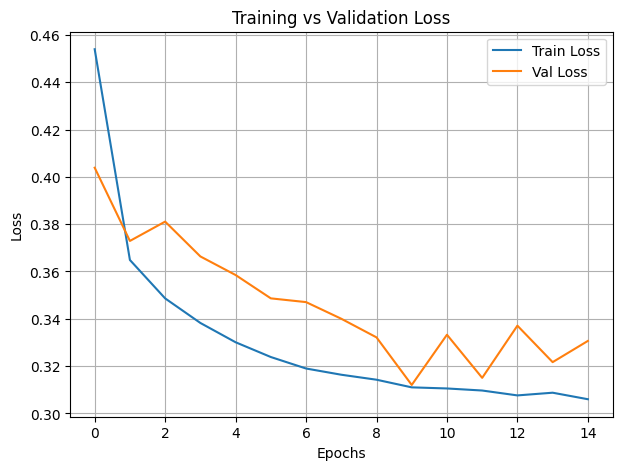

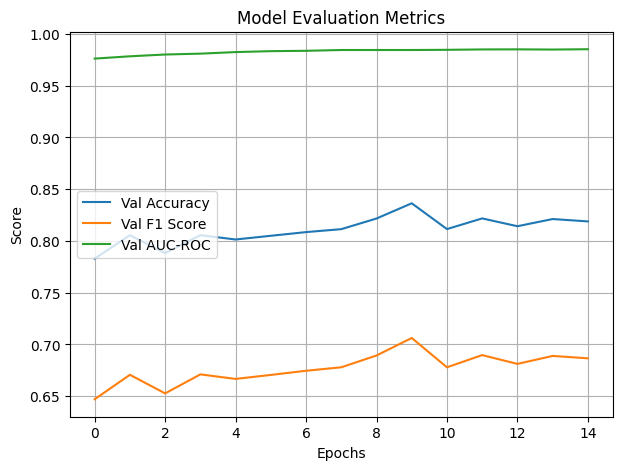

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import matplotlib.pyplot as plt

# ===========================
# GPU Setup
# ===========================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# ===========================
# 1. Split Data
# ===========================
TARGET_COLUMN = 'loan_status'
X = new_df.drop(columns=[TARGET_COLUMN]).values
y = new_df[TARGET_COLUMN].values.astype(np.float32)

X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train distribution:", Counter(y_train_np))
print("Test distribution:", Counter(y_test_np))

# ===========================
# 2. Standardization
# ===========================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# ===========================
# 3. Weighted Sampling for Imbalance
# ===========================
class_weights = compute_class_weight(class_weight="balanced",
                                    classes=np.unique(y_train_np),
                                    y=y_train_np)
pos_weight = torch.tensor([class_weights[1] / class_weights[0]]).to(device)

class_sample_count = np.array([Counter(y_train_np)[i] for i in np.unique(y_train_np)])
weights = 1.0 / class_sample_count
sample_weights = weights[y_train_np.astype(int)]
sample_weights_tensor = torch.from_numpy(sample_weights).double()

sampler = WeightedRandomSampler(weights=sample_weights_tensor,
                                num_samples=len(sample_weights_tensor),
                                replacement=True)

# ===========================
# 4. DataLoader
# ===========================
train_dataset = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32),
                             torch.tensor(y_train_np.reshape(-1,1), dtype=torch.float32))
test_dataset = TensorDataset(torch.tensor(X_test_scaled, dtype=torch.float32),
                            torch.tensor(y_test_np.reshape(-1,1), dtype=torch.float32))

train_loader = DataLoader(train_dataset, batch_size=512, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

# ===========================
# 5. Neural Network
# ===========================
model = nn.Sequential(
    nn.Linear(X_train_scaled.shape[1], 64),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(32, 1)
).to(device)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# ===========================
# 6. Training Loop
# ===========================
epochs = 15
train_losses, val_losses = [], []
val_accs, val_f1s, val_aucs = [], [],[]
train_accs = []

for epoch in range(epochs):
    model.train()
    running_train_loss = 0
    correct_train = 0
    total_train = 0

    for batch_x, batch_y in train_loader:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_train_loss += loss.item()

        preds = torch.sigmoid(outputs)
        pred_labels = (preds >= 0.5).float()
        correct_train += (pred_labels == batch_y).sum().item()
        total_train += batch_y.size(0)

    train_losses.append(running_train_loss / len(train_loader))
    train_accs.append(correct_train / total_train)

    # Validation
    model.eval()
    running_val_loss = 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for val_x, val_y in test_loader:
            val_x, val_y = val_x.to(device), val_y.to(device)
            val_out = model(val_x)
            val_loss = criterion(val_out, val_y)
            running_val_loss += val_loss.item()

            preds_val = torch.sigmoid(val_out).cpu().numpy()
            all_preds.extend(preds_val)
            all_labels.extend(val_y.cpu().numpy())

    val_losses.append(running_val_loss / len(test_loader))

    all_preds = np.array(all_preds)
    pred_labels_val = (all_preds >= 0.5).astype(int)
    val_acc = (pred_labels_val == all_labels).mean()
    val_f1 = f1_score(all_labels, pred_labels_val)
    val_auc = roc_auc_score(all_labels, all_preds)

    val_accs.append(val_acc)
    val_f1s.append(val_f1)
    val_aucs.append(val_auc)

    print(f"Epoch [{epoch+1}/{epochs}] "
          f"TrainLoss={train_losses[-1]:.4f} | ValLoss={val_losses[-1]:.4f} | "
          f"TrainAcc={train_accs[-1]:.4f} | ValAcc={val_acc:.4f} | "
          f"F1={val_f1:.4f} | AUC={val_auc:.4f}")

print("\nTraining Complete ✅")

# ===========================
# 7. PLOTS
# ===========================

# Loss Plot
plt.figure(figsize=(7,5))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()

# Accuracy, F1, AUC Plot
plt.figure(figsize=(7,5))
plt.plot(val_accs, label="Val Accuracy")
plt.plot(val_f1s, label="Val F1 Score")
plt.plot(val_aucs, label="Val AUC-ROC")
plt.title("Model Evaluation Metrics")
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()
